In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src')
import kernels

plt.rcParams.update({'font.family':'Arial', 'font.size': 10})

# Original Stokes' Kernel

Define spherical distance

In [3]:
sph_dist = np.arange(1,181)
sph_dist = np.radians(sph_dist)
nmax = 257
psi0 = 1

Call `kernels.stokes_func` to estimate Stokes' function at a given spherical distance

In [4]:
S,_ = kernels.stokes_psi(sph_dist)
# S_wg = kernels.wong_and_gore_psi(sph_dist, nmax=nmax)
# S_hg = kernels.heck_and_gruninger_psi(sph_dist, psi0=np.degrees(psi0), nmax=nmax)

Let's see how it looks

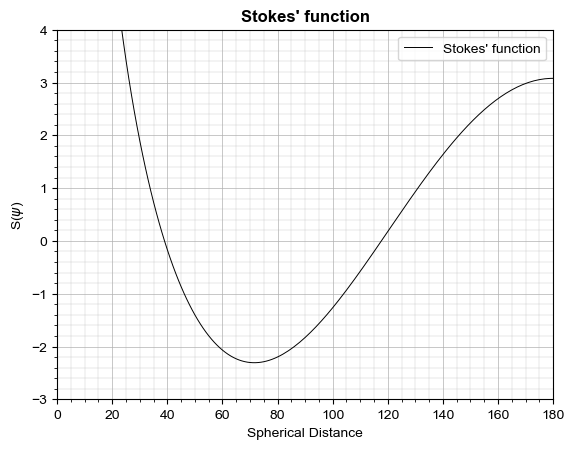

In [5]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,181), S, color='k', linewidth=.7, label='Stokes\' function')
# ax.plot(np.arange(1,181), S_wg, linewidth=.7, label='Wong & Gore')
# ax.plot(np.arange(1,181), S_hg, linewidth=.7, label='Heck & Gruninger')
ax.set_ylim([-3, 4])
ax.set_xlim([0, 180])
ax.set_title('Stokes\' function', fontweight='bold')
ax.grid(linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', linewidth=0.2)
ax.set_xlabel('Spherical Distance')
ax.set_ylabel(r'S($\psi$)')

ax.legend()
plt.show()

If you have access to the 2nd edtion of the book Physical Geodesy by Hofmann-Wellenhof and Moritz, go to Page 107 and compare Fig 2.17 with our output.

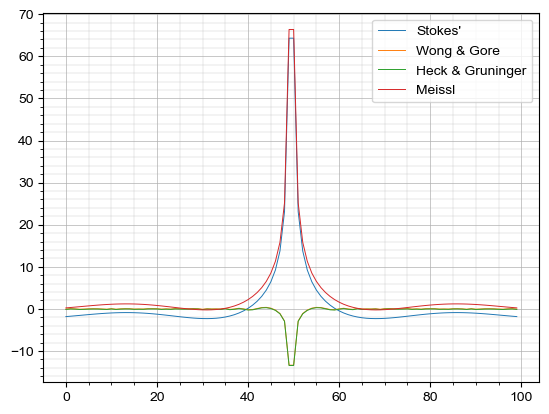

In [6]:
# lon = np.linspace(-180, 180, 100)
# lat = np.linspace(-90, 90, 100)
# comp_point = [0, 0]
# int_points = np.array([lon, lat]).T
# psi_0 = np.radians(60)
# nmax = 257

# S, cos_psi = kernels.stokes(comp_point, int_points)
# S_wg = kernels.wong_and_gore(comp_point, int_points, nmax)
# S_hg = kernels.heck_and_gruninger(comp_point, int_points, psi_0, nmax)
# S_m = kernels.meissl(comp_point, int_points, psi_0)

# stokes_kernels = [S, S_wg, S_hg, S_m]
# kernel_names = ['Stokes\'', 'Wong & Gore', 'Heck & Gruninger', 'Meissl']
# # stokes_kernels = [S_wg, S_hg]
# # kernel_names = ['Wong & Gore', 'Heck & Gruninger']

# fig, ax = plt.subplots()

# for kname, kernel in zip(kernel_names, stokes_kernels):
#     ax.plot(kernel, label=kname, linewidth=0.7)

# ax.grid(linewidth=0.5)
# ax.minorticks_on()
# ax.grid(which='minor', linewidth=0.2)
# ax.legend()
# plt.show()

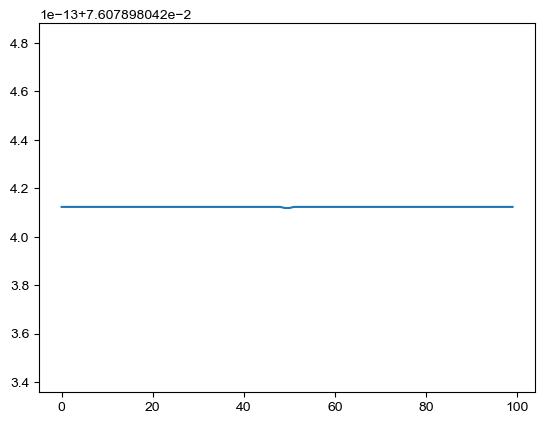

In [8]:
diff = S_wg - S_hg
plt.plot(diff)

In [9]:
step = 0.0001
# psi_max = 1
psi = np.arange(step, 4+step, step)
psi0 = 1
# psi0[psi0 > psi_max] = np.nan
nmax = 257

In [10]:
S, _ = kernels.stokes_psi(np.radians(psi))
S_wg257 = kernels.wong_and_gore_psi(np.radians(psi), nmax)
S_wg26 = kernels.wong_and_gore_psi(np.radians(psi), nmax=26)
S_hg = kernels.heck_and_gruninger_psi(np.radians(psi), np.radians(1), nmax=nmax)
S_hg[psi > psi0] = np.nan
S_m = kernels.meissl_psi(np.radians(psi), np.radians(psi0))
S_m[psi > psi0] = np.nan

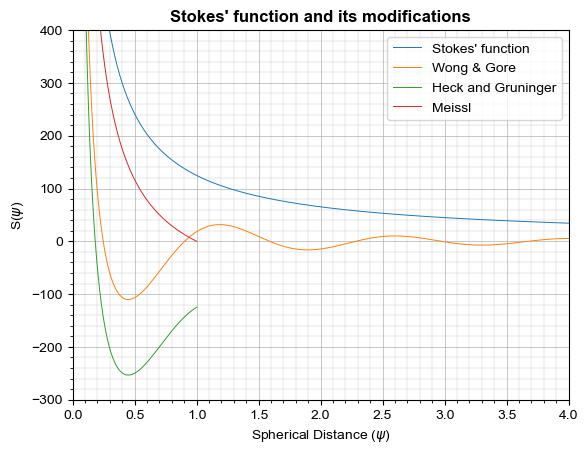

In [11]:
linewidth = 0.7
fig, ax = plt.subplots()
ax.plot(psi, S, label='Stokes\' function', linewidth=linewidth)
ax.plot(psi, S_wg257, label='Wong & Gore', linewidth=linewidth)
# ax.plot(psi, S_wg26, label='Wong & Gore: nmax=26', linewidth=linewidth)
ax.plot(psi, S_hg, label='Heck and Gruninger', linewidth=linewidth)
ax.plot(psi, S_m, label='Meissl', linewidth=linewidth)

# ax.set_ylim([-300,400])
# ax.set_xlim([0,4])
# ax.grid(linewidth=0.5)

# ax.set_xlabel(r'Spherical distance ($\psi$)')
# ax.set_ylabel('Kernel')

ax.set_ylim([-300, 400])
ax.set_xlim([0, 4])
ax.set_title('Stokes\' function and its modifications', fontweight='bold')
ax.grid(linewidth=0.5)
ax.minorticks_on()
ax.grid(which='minor', linewidth=0.2)
ax.set_xlabel(r'Spherical Distance ($\psi$)')
ax.set_ylabel(r'S($\psi$)')
ax.legend()

plt.show()